In [33]:
import pandas as pd
from google.colab import drive
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
from IPython.display import HTML

In [7]:
# Verwenden Sie 'files.upload()' zum Hochladen von Dateien
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving listings.csv.gz to listings.csv.gz


# Neuer Abschnitt

In [8]:
# Display first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2801 non-null   int64  
 1   listing_url                                   2801 non-null   object 
 2   scrape_id                                     2801 non-null   int64  
 3   last_scraped                                  2801 non-null   object 
 4   source                                        2801 non-null   object 
 5   name                                          2801 non-null   object 
 6   description                                   2764 non-null   object 
 7   neighborhood_overview                         1467 non-null   object 
 8   picture_url                                   2801 non-null   object 
 9   host_id                                       2801 non-null   i

In [9]:
# Get basic information about the dataset
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21134,https://www.airbnb.com/rooms/21134,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.75 · 1 bedroom · 1 be...,Cozy room in a shared flat with to other peopl...,"The flat is in the urban, a bit bohemian centr...",https://a0.muscache.com/pictures/1850842/2a1b8...,80446,...,4.90,4.58,4.83,NaN,f,2,0,2,0,0.51
1,120480,https://www.airbnb.com/rooms/120480,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.58 · 2 bedrooms · 2 b...,"Apartment ""Magic of Riga History"" is ideal for...",NaN,https://a0.muscache.com/pictures/1858364/affbf...,606352,...,4.89,4.94,4.76,NaN,f,1,1,0,0,3.64
2,253753,https://www.airbnb.com/rooms/253753,20230629191658,2023-06-29,previous scrape,Rental unit in Riga · ★4.92 · 1 bedroom · 2 be...,"Fireplace, free WIFI, kitchen, TV, DVD,<br /><...",NaN,https://a0.muscache.com/pictures/2508228/f55e6...,1332828,...,4.94,4.89,4.89,NaN,f,1,1,0,0,0.87
3,260539,https://www.airbnb.com/rooms/260539,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.58 · 2 bedrooms · 5 b...,Cosy yet spacious 5th floor apartment in the c...,"Apartment is located in the centre, Old town i...",https://a0.muscache.com/pictures/miso/Hosting-...,1297653,...,4.78,4.44,4.68,NaN,f,2,2,0,0,0.34
4,275688,https://www.airbnb.com/rooms/275688,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.69 · 1 bedroom · 3 be...,Stylish cozy 1-bedroom apartment in renovated ...,"Apartment located in the heart of Old Riga, th...",https://a0.muscache.com/pictures/a664ffa0-5d7f...,1441076,...,4.75,4.88,4.44,NaN,t,9,9,0,0,0.13


In [10]:
df.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2796,922926550953532703,https://www.airbnb.com/rooms/922926550953532703,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 2 bed...,Cozy apartment perfecltley fits for 2 guests o...,Čiekurkalns from historic perspective is one o...,https://a0.muscache.com/pictures/miso/Hosting-...,1151222,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2797,922975522747392477,https://www.airbnb.com/rooms/922975522747392477,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 1 bed...,Šis plašais 2 istabu (73 kvm) dzīvoklis atroda...,City center,https://a0.muscache.com/pictures/miso/Hosting-...,197731812,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2798,923249540208009942,https://www.airbnb.com/rooms/923249540208009942,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 1 bed...,* EXCELLENT LOCATION Right in the heart of Rig...,Central location for a budget price<br /><br /...,https://a0.muscache.com/pictures/eaf562c1-9cf6...,16886983,...,NaN,NaN,NaN,NaN,t,14,3,11,0,NaN
2799,923711881300999876,https://www.airbnb.com/rooms/923711881300999876,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 2 bed...,Ceļojums bez liekām raizēm šajā mierīgajā cent...,Mājoklis ar savu īpašu auru Rīgas vēsturiskajā...,https://a0.muscache.com/pictures/miso/Hosting-...,30036013,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2800,923801442823596095,https://www.airbnb.com/rooms/923801442823596095,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 2 bedrooms · 2 be...,Это уникальное жилье подарит яркие воспоминания.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,522530181,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [11]:
df.shape

(2801, 75)

In [12]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.801000e+03,2.801000e+03,2.801000e+03,2800.000000,2800.000000,0.0,2801.000000,2801.000000,2801.000000,0.0,...,2357.000000,2358.000000,2358.000000,2358.000000,0.0,2801.000000,2801.000000,2801.000000,2801.000000,2367.000000
mean,2.978057e+17,2.023063e+13,1.747685e+08,12.435714,17.083929,NaN,56.954872,24.120898,3.719743,NaN,...,4.882630,4.884580,4.789483,4.761573,NaN,7.369154,6.639414,0.627633,0.083542,1.541103
std,3.822959e+17,0.000000e+00,1.607871e+08,79.016743,142.266052,NaN,0.019173,0.033045,2.312003,NaN,...,0.302063,0.297307,0.329849,0.364504,NaN,10.886530,10.829388,2.568951,0.637084,1.656814
min,2.113400e+04,2.023063e+13,2.530700e+04,1.000000,1.000000,NaN,56.867120,23.968780,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.786571e+07,2.023063e+13,2.776495e+07,1.000000,2.000000,NaN,56.948430,24.107910,2.000000,NaN,...,4.880000,4.880000,4.710000,4.710000,NaN,1.000000,1.000000,0.000000,0.000000,0.350000
50%,4.698688e+07,2.023063e+13,1.329634e+08,3.000000,4.000000,NaN,56.952260,24.122450,4.000000,NaN,...,4.960000,4.970000,4.890000,4.840000,NaN,3.000000,2.000000,0.000000,0.000000,0.970000
75%,7.201902e+17,2.023063e+13,2.842365e+08,10.000000,12.000000,NaN,56.958570,24.135940,4.000000,NaN,...,5.000000,5.000000,5.000000,4.950000,NaN,9.000000,8.000000,0.000000,0.000000,2.160000
max,9.238014e+17,2.023063e+13,5.225302e+08,1837.000000,3334.000000,NaN,57.080890,24.268480,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,61.000000,61.000000,20.000000,6.000000,10.300000


In [13]:
# Set the display option to show all columns
#pd.set_option('display.max_columns', None)

# If a column has at least one missing value, the corresponding value in the Series will be True, otherwise it will be False.
print(df.isna().any())

# To count the number of True and False values in the Series returned
print(df.isna().any().value_counts())

id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
source                                          False
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 75, dtype: bool
False    40
True     35
dtype: int64


In [14]:
#check for duplicates
print(df.duplicated())

# To count the number of True and False values in the Series returned
print(df.duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
2796    False
2797    False
2798    False
2799    False
2800    False
Length: 2801, dtype: bool
False    2801
dtype: int64


In [15]:
# Count missing values
missing_values = df.isnull().sum()
print(missing_values)

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               434
Length: 75, dtype: int64


In [16]:
# Drop rows with missing values
df_clean = df.dropna()
print(df_clean)

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_

In [17]:
# Description of full listings of Riga InsideAirbnb
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.801000e+03,2.801000e+03,2.801000e+03,2800.000000,2800.000000,0.0,2801.000000,2801.000000,2801.000000,0.0,...,2357.000000,2358.000000,2358.000000,2358.000000,0.0,2801.000000,2801.000000,2801.000000,2801.000000,2367.000000
mean,2.978057e+17,2.023063e+13,1.747685e+08,12.435714,17.083929,NaN,56.954872,24.120898,3.719743,NaN,...,4.882630,4.884580,4.789483,4.761573,NaN,7.369154,6.639414,0.627633,0.083542,1.541103
std,3.822959e+17,0.000000e+00,1.607871e+08,79.016743,142.266052,NaN,0.019173,0.033045,2.312003,NaN,...,0.302063,0.297307,0.329849,0.364504,NaN,10.886530,10.829388,2.568951,0.637084,1.656814
min,2.113400e+04,2.023063e+13,2.530700e+04,1.000000,1.000000,NaN,56.867120,23.968780,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.786571e+07,2.023063e+13,2.776495e+07,1.000000,2.000000,NaN,56.948430,24.107910,2.000000,NaN,...,4.880000,4.880000,4.710000,4.710000,NaN,1.000000,1.000000,0.000000,0.000000,0.350000
50%,4.698688e+07,2.023063e+13,1.329634e+08,3.000000,4.000000,NaN,56.952260,24.122450,4.000000,NaN,...,4.960000,4.970000,4.890000,4.840000,NaN,3.000000,2.000000,0.000000,0.000000,0.970000
75%,7.201902e+17,2.023063e+13,2.842365e+08,10.000000,12.000000,NaN,56.958570,24.135940,4.000000,NaN,...,5.000000,5.000000,5.000000,4.950000,NaN,9.000000,8.000000,0.000000,0.000000,2.160000
max,9.238014e+17,2.023063e+13,5.225302e+08,1837.000000,3334.000000,NaN,57.080890,24.268480,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,61.000000,61.000000,20.000000,6.000000,10.300000


In [18]:
# check price column
print(df['price'])
print(df['price'].isna().sum())
print(df['price'].dtype)

0       $10.00
1       $56.00
2       $58.00
3       $80.00
4       $75.00
         ...  
2796    $96.00
2797    $85.00
2798    $41.00
2799    $56.00
2800    $64.00
Name: price, Length: 2801, dtype: object
0
object


In [19]:
# delete dollar type and change the dtype from object to float
# create a copy of the dataset
df_clean = df.copy()
df_clean['price'] = df_clean['price'].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-19-cfe1da2bdd89>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['price'] = df_clean['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [20]:
# check price column for df_lisbon_clean
print(df_clean['price'])
print(df_clean['price'].isna().sum())
print(df_clean['price'].dtype)

0       10.0
1       56.0
2       58.0
3       80.0
4       75.0
        ... 
2796    96.0
2797    85.0
2798    41.0
2799    56.0
2800    64.0
Name: price, Length: 2801, dtype: float64
0
float64


In [21]:
# we decided on accommodates <= 2
# delete dollar type and change the dtype from object to float
# create a copy of the dataset

filtered_df = df_clean[df_clean['accommodates'] <= 2]
print(filtered_df['price'])

0       10.0
5       45.0
9       52.0
15      40.0
19      96.0
        ... 
2777    63.0
2785    51.0
2786    45.0
2790    40.0
2798    41.0
Name: price, Length: 1111, dtype: float64


In [22]:
average_price = filtered_df['price'].mean()
print(f"The average price of an Airbnb listing in the dataset is ${average_price:.2f}")

#-----
highest_price = filtered_df['price'].max()
print(f"The highest price of an Airbnb listing in the dataset is ${highest_price}")

# Get the index of the row with the highest price
index_of_max_price = filtered_df['price'].idxmax()

# Retrieve the row using the index
row_with_max_price = filtered_df.loc[index_of_max_price]

# Print the row
print(row_with_max_price)

#----- price higher 1000 per night
# Filter rows where price is greater than 1000
rows_with_price_above_1000 = filtered_df[filtered_df['price'] > 1000]

# Print the rows
print(rows_with_price_above_1000)
# Print the rows along with their prices
print(rows_with_price_above_1000[['price']])

#---- drop the high price row 65k
# Find the indices of rows where price is greater than 2000
indices_to_remove = filtered_df[filtered_df['price'] > 2000].index

# Drop those rows from the DataFrame
filtered_df.drop(indices_to_remove, inplace=True)

The average price of an Airbnb listing in the dataset is $55.19
The highest price of an Airbnb listing in the dataset is $1000.0
id                                                                           19065190
listing_url                                     https://www.airbnb.com/rooms/19065190
scrape_id                                                              20230629191658
last_scraped                                                               2023-06-29
source                                                                previous scrape
                                                                ...                  
calculated_host_listings_count                                                      1
calculated_host_listings_count_entire_homes                                         0
calculated_host_listings_count_private_rooms                                        1
calculated_host_listings_count_shared_rooms                                         0
reviews_per

<ipython-input-22-ae4d2f9e7a8e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(indices_to_remove, inplace=True)


In [23]:
column_type = filtered_df['amenities'].dtype
print(f"Data type of 'amenities': {column_type}")

sample_entry = filtered_df['amenities'].iloc[0]  # This gets the first entry, but you can choose any index
print(f"Sample entry from 'amenities': {sample_entry}")

Data type of 'amenities': object
Sample entry from 'amenities': ["City skyline view", "Indoor fireplace", "Bed linens", "Drying rack for clothing", "Kitchen", "Heating", "Wifi", "Dryer", "Refrigerator", "Dining table", "Essentials", "Room-darkening shades", "Courtyard view", "Bathtub", "Washer", "Dishes and silverware", "Hot water", "Hangers", "Iron"]


In [24]:
# Count the number of times 'wifi' or 'Wifi' appears in the 'amenities' column
wifi_count = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x).sum()
print(f"'Wifi' or 'wifi' appears in {wifi_count} rows.")

'Wifi' or 'wifi' appears in 1061 rows.


In [25]:
column_type = filtered_df['review_scores_value'].dtype
print(f"Data type of 'review_scores_value': {column_type}")

sample_entry = filtered_df['review_scores_rating'].iloc[0]  # This gets the first entry, but you can choose any index
print(f"Sample entry from 'review_scores_value': {sample_entry}")

average_score = filtered_df['review_scores_rating'].mean()
print(f"The average review score rating in the dataset is {average_score:.2f}")


# Check if there are missing values in the 'review_scores_value' column
missing_values = filtered_df['review_scores_value'].isna().sum()

if missing_values > 0:
    print(f"There are {missing_values} missing values in the 'review_scores_value' column.")
else:
    print("There are no missing values in the 'review_scores_value' column.")

Data type of 'review_scores_value': float64
Sample entry from 'review_scores_value': 4.75
The average review score rating in the dataset is 4.76
There are 204 missing values in the 'review_scores_value' column.


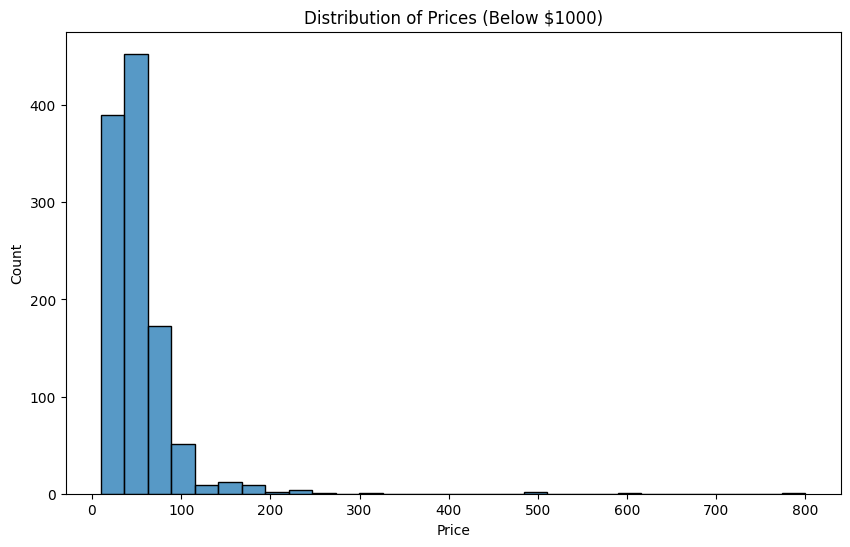

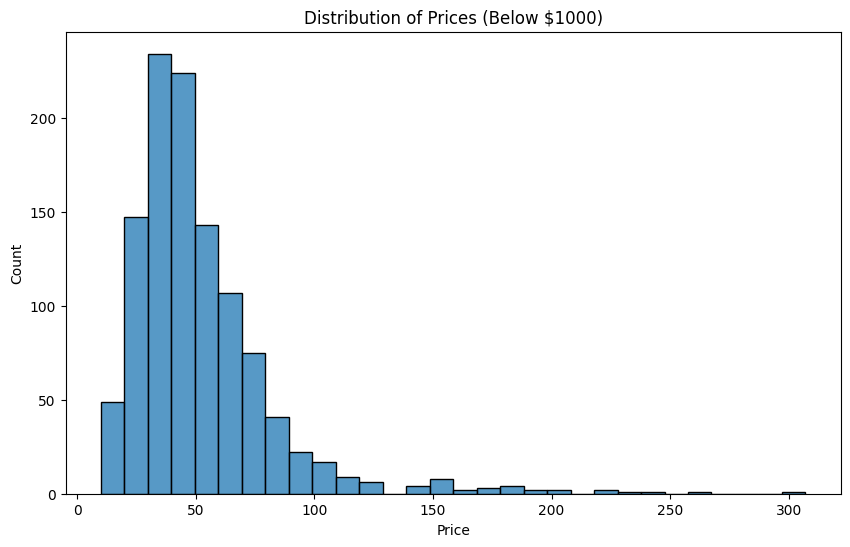

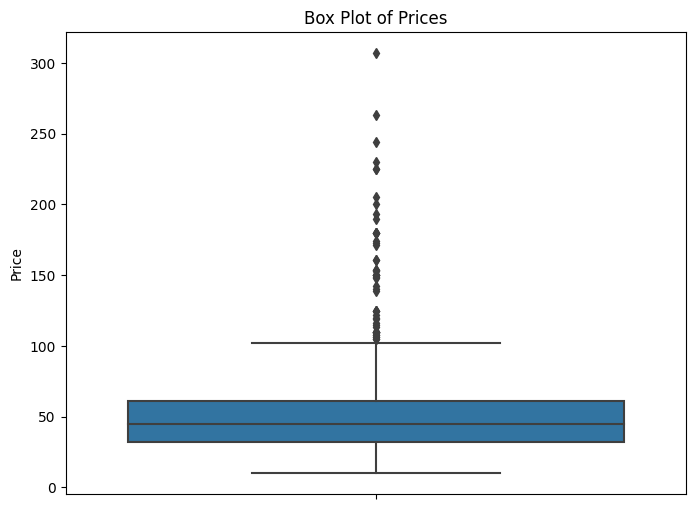

In [26]:
# Data visualization
# Histogram
# Histogram (Considering listings with price below $1000):
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df[filtered_df['price'] < 1000]['price'], kde=False, bins=30)
plt.title('Distribution of Prices (Below $1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Histogram (Considering listings with price below $400):
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df[filtered_df['price'] < 400]['price'], kde=False, bins=30)
plt.title('Distribution of Prices (Below $1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df[filtered_df['price'] < 400]['price'])
plt.title('Box Plot of Prices')
plt.ylabel('Price')
plt.show()

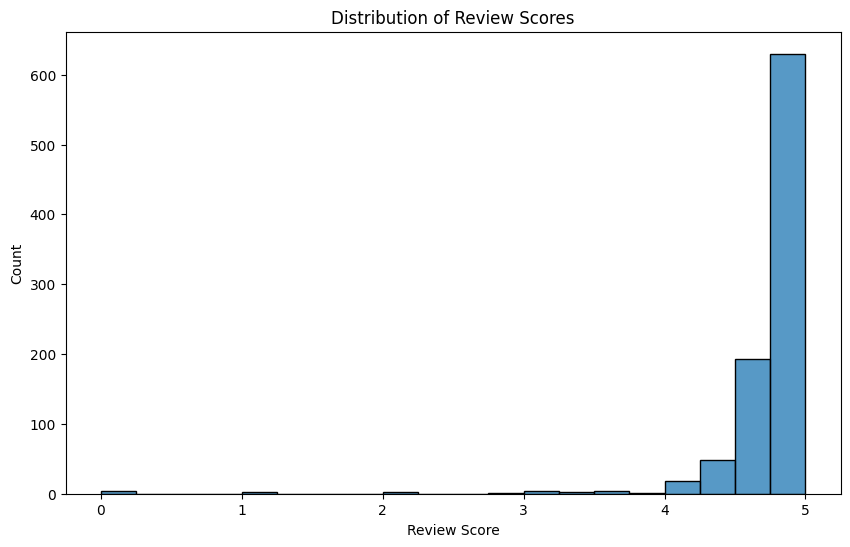

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['review_scores_rating'], kde=False, bins=20)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

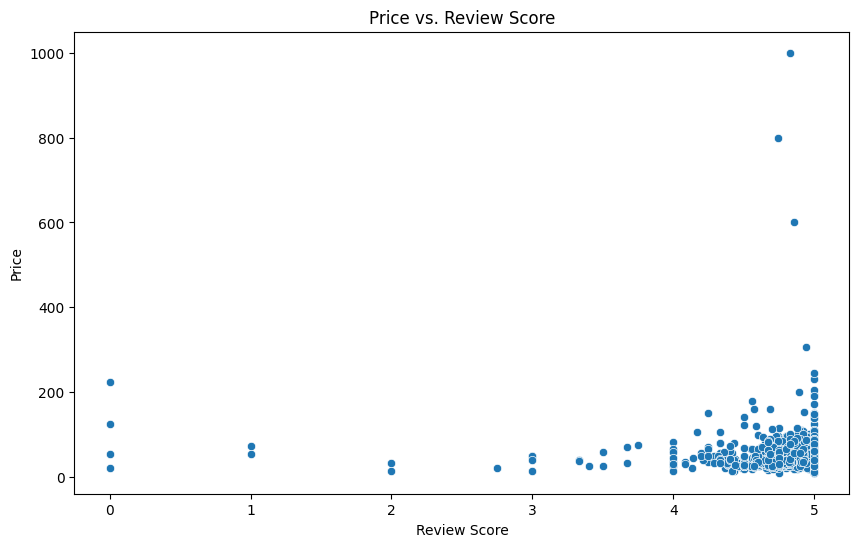

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['review_scores_rating'], y=filtered_df['price'])
plt.title('Price vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.show()

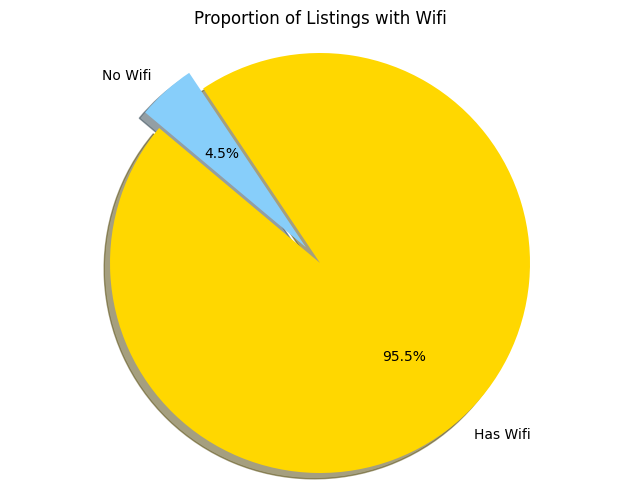

In [29]:
# Check for presence of 'Wifi' or 'wifi' in 'amenities' column
wifi_present = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x).sum()
wifi_not_present = len(filtered_df) - wifi_present


# Data to plot
labels = 'Has Wifi', 'No Wifi'
sizes = [wifi_present, wifi_not_present]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Listings with Wifi')
plt.show()

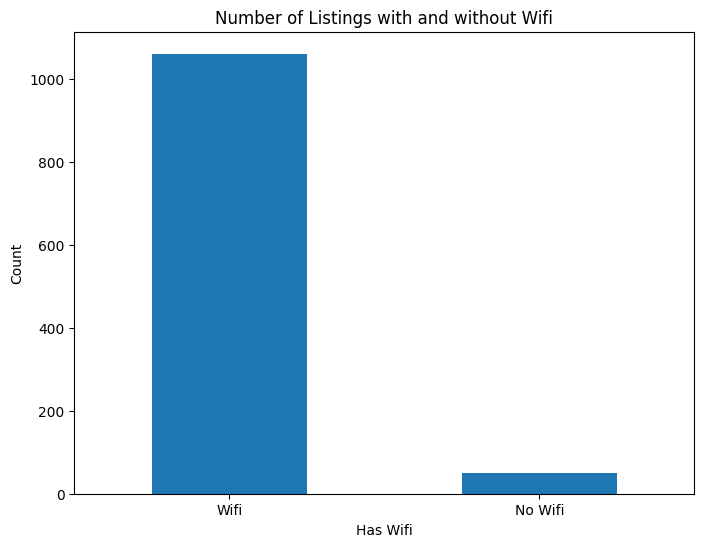

In [30]:
has_wifi = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x)
wifi_counts = has_wifi.value_counts()

plt.figure(figsize=(8, 6))
wifi_counts.plot(kind='bar')
plt.title('Number of Listings with and without Wifi')
plt.xlabel('Has Wifi')
plt.ylabel('Count')
plt.xticks([0, 1], ['Wifi', 'No Wifi'], rotation=0)
plt.show()

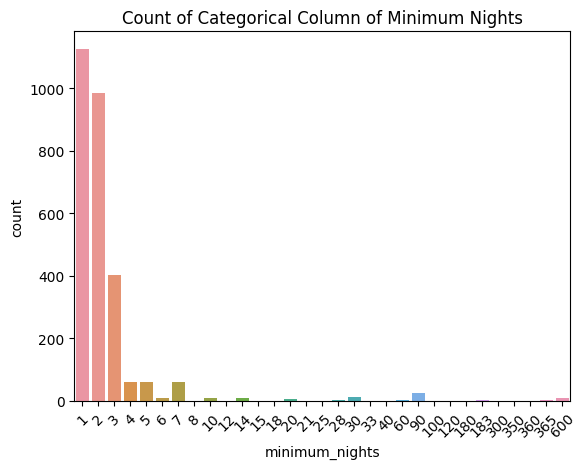

In [31]:
# Bar plot of a categorical column
sns.countplot(data=df, x='minimum_nights')
plt.title('Count of Categorical Column of Minimum Nights')
plt.xticks(rotation=45)
plt.show()

In [34]:
map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Fügen Sie jeden Eintrag zur Karte hinzu
for idx, row in filtered_df.iterrows():
    color = 'green'  # Standardfarbe
    if row['review_scores_rating'] < 80:
        color = 'red'
    elif row['review_scores_rating'] < 90:
        color = 'blue'
    # Ansonsten wird die Farbe grün sein für Bewertungen >= 90

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m)

# Speichern Sie die Karte
m.save('map.html')

# Zeigen Sie die Karte in Colab an
HTML(filename='map.html')

In [35]:
map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Fügen Sie jeden Eintrag zur Karte hinzu
for idx, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],  # Hier können Sie einen Popup-Text hinzufügen, um den Namen des Listings anzuzeigen
    ).add_to(m)

m.save('map.html')